# Iris Data set classification problem


"""This data set consists of the physical parameters of three species of 
flower — Versicolor, Setosa and Virginica.
The numeric parameters which the dataset contains are Sepal width, Sepal length, Petal width and Petal length.
In this data we will be predicting the classes of the flowers based on these parameters.
The data consists of continuous numeric values which describe the dimensions of the respective features. 
We will be training the model based on these features."""

Import all the necessary packages

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import scale
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

fetch the column name from Iris.names file and load the data from csv file

In [2]:
#fetch the column name from Iris.names file
column_names = ['sepel_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
# load the data
dataset = pd.read_csv('iris.data', names = column_names ,header=None)

check the data first 3 and remove if any null valued in column or rows are present

In [3]:
# check the data first 3
print(dataset.head(3))
#dataset.tail(3)
# check if any null value is present or not in any column
print(dataset.isnull().sum())
# print the small summary of data
dataset.describe()

   sepel_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
sepel_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64


,sepel_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


box and whisker plots for see the distribution and median of data
sharex : boolean, default True if ax is None else False In case subplots=True, share x axis and set some x axis labels to invisible; defaults to True
subplots : boolean, default False Make separate subplots for each column
layout : tuple (optional) (rows, columns) for the layout of subplots
sharey : boolean, default False In case subplots=True, share y axis and set some y axis labels to invisible

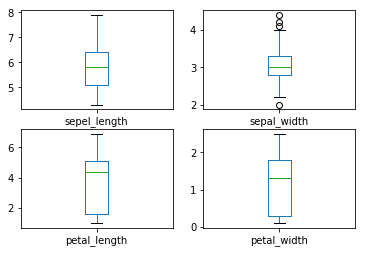

In [4]:
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

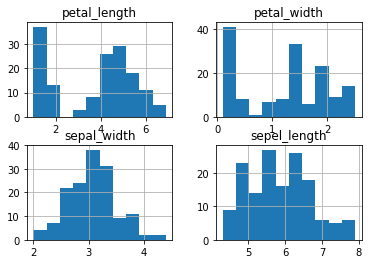

In [5]:
# histograms
dataset.hist()
plt.show()

scatter plot matrix
This method helps just to figure out the important features which account the most for the classification in our model.
In This method we will get seperate graph for different combinations.

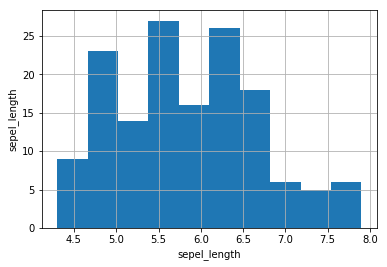

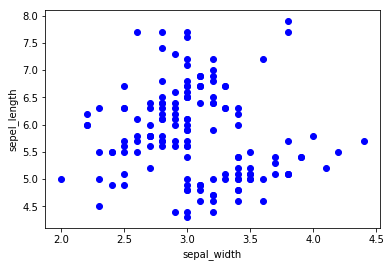

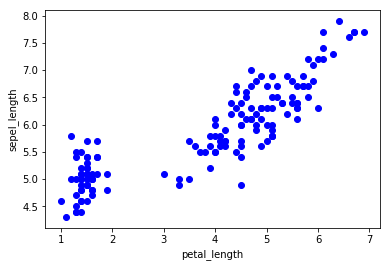

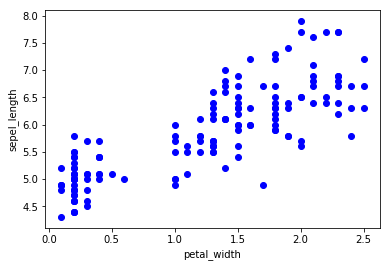

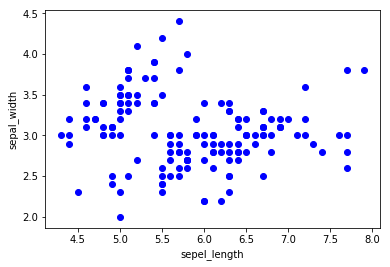

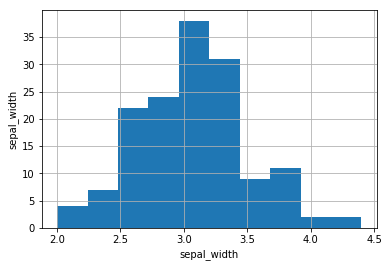

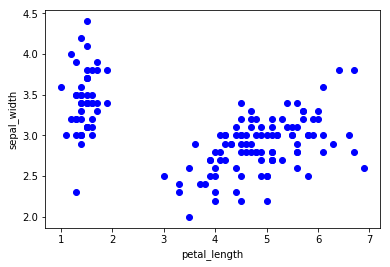

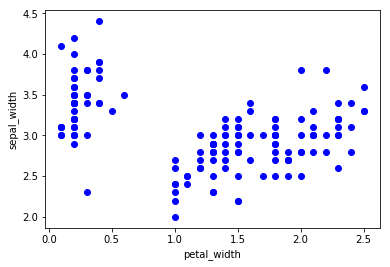

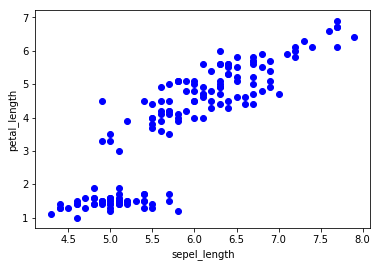

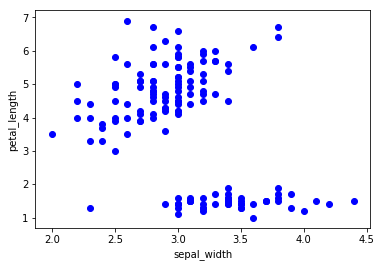

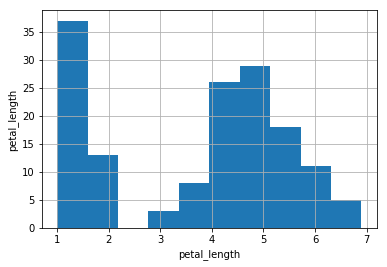

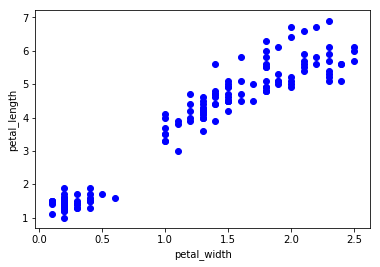

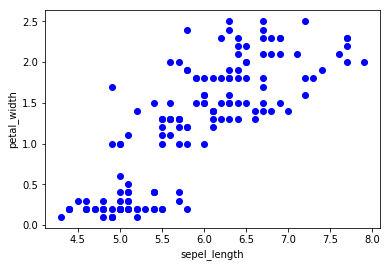

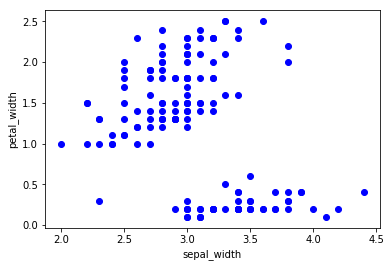

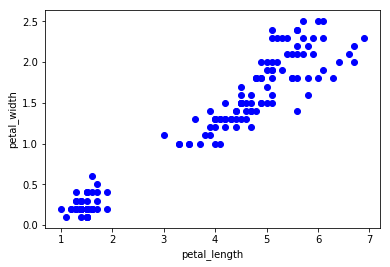

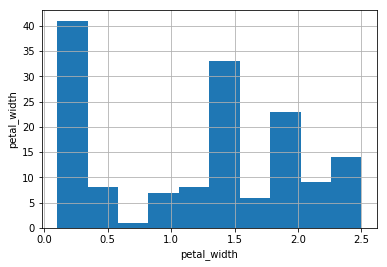

In [6]:
feature_name = column_names[:-1]
l = len(feature_name)
for i in range(l) :
    for j in range(l) :
        if i == j :
            dataset[feature_name[i]].hist()
        else :
            plt.scatter(dataset[feature_name[j]],dataset[feature_name[i]], c= 'blue')
        plt.xlabel(feature_name[j])
        plt.ylabel(feature_name[i])
        plt.show()
plt.show()

to view the correlation to see the correlation between each feature.It is similar to the previous method 
but it gives you the correlation coefficient +ve for positive relation -ve for -ve relation and 0 for 
no relation by visualizing these coefficient we can elemenate those feature which has loosely related

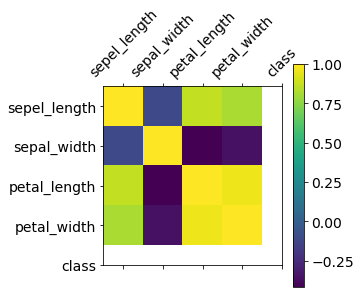

In [7]:
corr = dataset.corr()
plt.matshow(corr)
plt.xticks(range(dataset.shape[1]), dataset.columns, fontsize=14, rotation=45)
plt.yticks(range(dataset.shape[1]), dataset.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.show()
# this time we will keep all the feature

Split-out validation dataset

In [8]:
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
test_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)

create generic model object which store all the Information of related model

In [9]:
class ModelObject :
    def __init__(self, name) :
        self._name = name
        self._cross_validation_score = None
        self._cross_validation_score_mean = None
        self._cross_validation_score_std = None
        self._model = None
    @property
    def name(self) :
        return self._name
    @property
    def cross_validation_score(self) :
        return self._cross_validation_score
    @cross_validation_score.setter
    def cross_validation_score(self, value) :
        try :
            self._cross_validation_score = value
            self._cross_validation_score_mean = value.mean()
            self._cross_validation_score_std = value.std()
        except Exception as e:
            raise Exception('value object is not in format',e)
    @property
    def cross_validation_mean(self) :
        return self._cross_validation_score_mean
    @property
    def cross_validation_std(self) :
        return self._cross_validation_score_std
    @property
    def model(self) :
        return self._model
    @model.setter
    def model(self, value) :
        self._model = value
        self._cross_validation_score = None
        self._cross_validation_score_mean = None
        self._cross_validation_score_std = None
    def __str__(self) :
        res = '\n'
        res += 'Model Name :- ' + self._name + '\n'
        res += 'cross validation score :- ' + str(self._cross_validation_score) + '\n'
        res += 'cross validation mean :- ' + str(self._cross_validation_score_mean) + '\n'
        res += 'cross validation standerd deviation :- ' + str(self._cross_validation_score_std) + '\n'
        if self._model != None :
            res += 'Model Parameter ' + str(self._model.get_params) + '\n'
        else :
            res += '\n'
        return res

# Train with different different model to check which model perform better

## 1. LogisticRegression

we dont need to normalize the data In case of logistic regression, once a value crosses a threshold, it saturates. 
There is no additional information to be gained by having a much
larger value than the threshold (or much smaller value).
This smoothing is done by the exponential function in logistic regression.
Consequently, scales of inputs do not matter much.

In [10]:
# c is 1\lambda = 1
# solver option  {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}
# multi_class : str, {‘ovr’, ‘multinomial’, ‘auto’}
#update sklearn and add on one more parameter l1_ratio=None
def get_optimal_modellr(lambda_value) :
    lambda_val = lambda_value
    #lambda_val = 0.21
    iter_max = 5000
    seed_k_fold = 7
    no_of_split = 10
    scoring = 'accuracy'
    lr = ModelObject('LogisticRegression')
    kfold = model_selection.KFold(n_splits= no_of_split, random_state=seed_k_fold)
    lr.model = LogisticRegression(penalty='l2',dual=False,tol=1e-4,
                                  C=(1/lambda_val), fit_intercept = True,
                                  intercept_scaling=1,class_weight=None,
                                  random_state=None,solver='saga',max_iter=iter_max,
                                  multi_class= 'multinomial',verbose=0,warm_start=False,
                                  n_jobs=None)
    cv_results = model_selection.cross_val_score(lr.model, X_train, Y_train,cv=kfold, scoring=scoring)
    lr.cross_validation_score = cv_results
    return lr
# finding the best value of lambda by cross validation
range_lambda  = np.logspace(0.001, 2, num=60)
index = 0
for  i in range_lambda :
    print(index, i)
    temp = get_optimal_modellr(i)
    print('lambda '+str(1/i) + '--validation mean '+str(temp.cross_validation_mean))
    #temp.model.fit(X_train,Y_train)
    #predicted = temp.model.predict(X_test[:,:])
    #print(accuracy_score(Y_test, predicted))
    index += 1

0 1.0023052380778996
lambda 0.9977000638225534--validation mean 0.9833333333333332
1 1.0836308385723221
lambda 0.9228234970845742--validation mean 0.9833333333333332
2 1.1715550809220558
lambda 0.8535663549109139--validation mean 0.9833333333333332
3 1.266613369404105
lambda 0.7895069041237605--validation mean 0.9833333333333332
4 1.3693845502258168
lambda 0.730255062272388--validation mean 0.9916666666666666
5 1.4804944363404138
lambda 0.6754500222721995--validation mean 0.9916666666666666
6 1.6006196182609715
lambda 0.6247580553126495--validation mean 0.9916666666666666
7 1.7304915840783446
lambda 0.5778704786551143--validation mean 0.9916666666666666
8 1.8709011737713979
lambda 0.5345017759458567--validation mean 0.9916666666666666
9 2.022703394933544
lambda 0.4943878585979508--validation mean 0.9916666666666666
10 2.186822629240382
lambda 0.4572844576550598--validation mean 0.9916666666666666
11 2.364258261362603
lambda 0.42296563634451073--validation mean 0.9916666666666666
12 2.5

In [11]:
# best value of accuracy found between lambda = 1.3693845502258168 and lambda = 3.492220801650795
range_lambda[4:18]
# selecting lambda = 1.4804944363404138
lambda_val = 3.492220801650795
lr = get_optimal_modellr(lambda_val)
lr.model.fit(X_train,Y_train)
predicted = lr.model.predict(X_test[:,:])
print(sum(Y_test==predicted)/len(Y_test))
print(dataset['class'].unique())
print(confusion_matrix(Y_test, predicted,labels=dataset['class'].unique()))
print('Accuracy ',accuracy_score(Y_test, predicted))

0.8666666666666667
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
[[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]
Accuracy  0.8666666666666667


## 2.KNeighborsClassifier

In [12]:
def get_optimal_modelKNN(k_val) :
    k=k_val
    seed_k_fold = 7
    no_of_split = 10
    scoring = 'accuracy'
    algo='brute' #'brute', 'ball_tree', 'kd_tree' 'auto'
    #leaf size = 30 used in ball or kd trees to speed up the construction query
    # metric string or callable default is minkowski
    # metric_params additional kwargs provided to callable metric
    knn = ModelObject('KNeighborsClassifier')
    kfold = model_selection.KFold(n_splits= no_of_split, random_state=seed_k_fold)
    knn.model = KNeighborsClassifier(n_neighbors=k, weights='uniform', algorithm=algo,
                     leaf_size=30, p=2, metric='minkowski', metric_params=None,
                     n_jobs=None)
    # scale x 
    cv_results = model_selection.cross_val_score(knn.model, scale(X_train), Y_train,cv=kfold, scoring=scoring)
    knn.cross_validation_score = cv_results
    return knn
index = 0
for  i in range(5,31) :
    # print(index, i)
    temp = get_optimal_modelKNN(i)
    print('k '+str(i) + '--validation mean '+str(temp.cross_validation_mean))
    temp.model.fit(X_train,Y_train)
    #predicted = temp.model.predict(X_test[:,:])
    #print('Accuracy ',accuracy_score(Y_test, predicted))
    index += 1

k 5--validation mean 0.9666666666666666
k 6--validation mean 0.9666666666666666
k 7--validation mean 0.9749999999999999
k 8--validation mean 0.9749999999999999
k 9--validation mean 0.9749999999999999
k 10--validation mean 0.9749999999999999
k 11--validation mean 0.9749999999999999
k 12--validation mean 0.9833333333333332
k 13--validation mean 0.9749999999999999
k 14--validation mean 0.975
k 15--validation mean 0.975
k 16--validation mean 0.975
k 17--validation mean 0.975
k 18--validation mean 0.975
k 19--validation mean 0.9666666666666666
k 20--validation mean 0.975
k 21--validation mean 0.9583333333333333
k 22--validation mean 0.9666666666666666
k 23--validation mean 0.9583333333333334
k 24--validation mean 0.9666666666666666
k 25--validation mean 0.9416666666666667
k 26--validation mean 0.95
k 27--validation mean 0.9416666666666667
k 28--validation mean 0.9416666666666667
k 29--validation mean 0.9416666666666667
k 30--validation mean 0.9333333333333332


by cross validation putting k=14 for better accuracy

In [13]:
k=14
knn = get_optimal_modelKNN(k)
knn.model.fit(X_train,Y_train)
predicted = knn.model.predict(X_test[:,:])
print(dataset['class'].unique())
print(confusion_matrix(Y_test, predicted,labels=dataset['class'].unique()))
print(accuracy_score(Y_test, predicted))

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
[[ 7  0  0]
 [ 0 11  1]
 [ 0  1 10]]
0.9333333333333333


## 3.DecisionTreeClassifier

In [14]:
def get_optimal_modelDecisionTree(min_sample_leaf=1,min_samples_split=2) :
    min_sam_lf = min_sample_leaf
    seed_k_fold = 7
    no_of_split = 10
    scoring = 'accuracy'
    criterian = 'gini' # Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.
    dt = ModelObject('DecisionTreeClassifier')
    kfold = model_selection.KFold(n_splits= no_of_split, random_state=seed_k_fold)
    dt.model = DecisionTreeClassifier(criterion=criterian, splitter='best', max_depth=None,
                                       min_samples_split=min_samples_split,min_samples_leaf=min_sam_lf,
                                       min_weight_fraction_leaf=0.0, max_features=None,
                                       random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0,
                                       min_impurity_split=None, class_weight=None, presort=False)
    cv_results = model_selection.cross_val_score(dt.model, X_train, Y_train,cv=kfold, scoring=scoring)
    dt.cross_validation_score = cv_results
    return dt

In [15]:
# building model by brute force we got 2 parameter value 3 and 8
dt = get_optimal_modelDecisionTree(min_sample_leaf=3,min_samples_split=8)
print('validation mean '+str(dt.cross_validation_mean))
dt.model.fit(X_train,Y_train)
predicted = dt.model.predict(X_test[:,:])
print(dataset['class'].unique())
print(confusion_matrix(Y_test, predicted,labels=dataset['class'].unique()))
print(accuracy_score(Y_test, predicted))

validation mean 0.975
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
[[ 7  0  0]
 [ 0 10  2]
 [ 0  1 10]]
0.9


## 4.GaussianNB

In [16]:
def get_optimal_modelGaussianNB() :
    seed_k_fold = 7
    no_of_split = 10
    scoring = 'accuracy'
    gnb = ModelObject('GaussianNB')
    kfold = model_selection.KFold(n_splits= no_of_split, random_state=seed_k_fold)
    # var_smoothing :- Portion of the largest variance of all features that is added to variances for calculation stability
    gnb.model = GaussianNB(priors=None, var_smoothing=1e-09)
    cv_results = model_selection.cross_val_score(gnb.model, X_train, Y_train,cv=kfold, scoring=scoring)
    gnb.cross_validation_score = cv_results
    return gnb

building model with default setting in gaussian NB classifier

In [17]:
gnb = get_optimal_modelGaussianNB()
print('validation mean '+str(gnb.cross_validation_mean))
gnb.model.fit(X_train,Y_train)
predicted = gnb.model.predict(X_test[:,:])
print(dataset['class'].unique())
print(confusion_matrix(Y_test, predicted,labels=dataset['class'].unique()))
print(accuracy_score(Y_test, predicted))

validation mean 0.975
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
[[7 0 0]
 [0 9 3]
 [0 2 9]]
0.8333333333333334


## 5.support vector classifier

In [18]:
def get_optimal_modelSVC(c=1.0) :
    seed_k_fold = 7
    no_of_split = 10
    scoring = 'accuracy'
    # c is Penalty parameter  of the error term
    kernel_val = 'rbf' #‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’
    deg = 3 # degree of polynomial kernel function ignore if other kernel
    decision_shape = 'ovo' # ovo one vs one ovr one vs other
    # original one-vs-one (‘ovo’)  classifier used is (n_class*n_class-1)/2
    # if one-vs-rest (‘ovr’) classifier used is (n_class) are used 
    gamma = 'auto' #Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
    #coef0 Independent term in kernel function. It is only significant in ‘poly’ and ‘sigmoid’.
    svc = ModelObject('support vector classifier')
    kfold = model_selection.KFold(n_splits= no_of_split, random_state=seed_k_fold)
    svc.model = SVC(C=c, kernel=kernel_val, degree=deg, gamma=gamma, coef0=0.0,
                    shrinking=True, probability=False, tol=0.001, cache_size=200,
                    class_weight=None, verbose=False, max_iter=-1, decision_function_shape=decision_shape,
                    random_state=None)
    cv_results = model_selection.cross_val_score(svc.model, scale(X_train), Y_train,cv=kfold, scoring=scoring)
    svc.cross_validation_score = cv_results
    return svc

 building model with default setting in support vector classifier

In [19]:
svc = get_optimal_modelSVC()
print('validation mean '+str(svc.cross_validation_mean))
svc.model.fit(X_train, Y_train)
print(dataset['class'].unique())
predicted = svc.model.predict(X_test[:, :])
print(confusion_matrix(Y_test, predicted, labels=dataset['class'].unique()))
print(accuracy_score(Y_test, predicted))

validation mean 0.975
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
0.9333333333333333


## 6.Linear discriminant analysis

In [20]:
def get_optimal_modelLDA() :
    seed_k_fold = 7
    no_of_split = 10
    scoring = 'accuracy'
    solver = 'svd' #svd lsqr eigen
    shrink = None# None,  0.0< val<= 1.0'
    #n_component = min(n_class-1, n_feature)
    lda = ModelObject('linear discriminant analysis')
    kfold = model_selection.KFold(n_splits= no_of_split, random_state=seed_k_fold)
    lda.model = LinearDiscriminantAnalysis(solver='svd', shrinkage=shrink, priors=None, n_components=None,
                                           store_covariance=True, tol=0.0001)
    cv_results = model_selection.cross_val_score(lda.model, X_train, Y_train,cv=kfold, scoring=scoring)
    lda.cross_validation_score = cv_results
    return lda

In [21]:
# building model with default setting in linear discriminant analysis
lda = get_optimal_modelLDA()
print('validation mean '+str(lda.cross_validation_mean))
lda.model.fit(X_train,Y_train)
predicted = lda.model.predict(X_test[:,:])
print(dataset['class'].unique())
print(confusion_matrix(Y_test, predicted,labels=dataset['class'].unique()))
print(accuracy_score(Y_test, predicted))

validation mean 0.975
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
[[ 7  0  0]
 [ 0 11  1]
 [ 0  0 11]]
0.9666666666666667


## Ensemble Approach

### 1. Random Forest Classifier

In [33]:
def get_optimal_model_random_forest_classifier(no_of_trees, max_depth, min_samples_lf, min_samples_splt, verbose = True) :
    #no_of_trees, max_depth, min_samples_lf, min_samples_splt  = 10, None, 2, 2
    criteria = 'gini'
    rf =  RandomForestClassifier(n_estimators=no_of_trees, criterion=criteria, max_depth=max_depth,
                                  min_samples_split=min_samples_splt, min_samples_leaf=min_samples_lf,
                                  min_weight_fraction_leaf=0.0, max_features=None, max_leaf_nodes=None,
                                  min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True,
                                  oob_score=False, n_jobs=None, random_state=None, verbose=0,
                                  warm_start=False, class_weight=None)
    if verbose :
        print('no_of_trees {0} max depth {1} , minimum sample leaf - {2} minimum sample split {3}'.format(str(no_of_trees),
                                                                                                        str(max_depth), 
                                                                                                        str(min_samples_lf),
                                                                                                        str(min_samples_splt)))
    rf_class = ModelObject('Random Forest Classifier')
    rf_class.model = rf
    return rf_class

In [34]:
rf = get_optimal_model_random_forest_classifier(no_of_trees=100, max_depth=None, min_samples_lf=1, min_samples_splt=2)
rf.model.fit(X_train,Y_train)
predicted = rf.model.predict(X_test[:,:])
print(dataset['class'].unique())
print(confusion_matrix(Y_test, predicted,labels=dataset['class'].unique()))
print(accuracy_score(Y_test, predicted))

no_of_trees 100 max depth None , minimum sample leaf - 1 minimum sample split 2
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
[[ 7  0  0]
 [ 0 10  2]
 [ 0  1 10]]
0.9


### 2.Extra Tree Classifier

In [65]:
def get_optimal_model_extra_tree_classifier(no_of_trees, max_depth, min_samples_lf, min_samples_splt, verbose = True) :
    #no_of_trees, max_depth, min_samples_lf, min_samples_splt  = 10, None, 2, 2
    criteria = 'gini'
    et =  ExtraTreesClassifier(n_estimators=no_of_trees, criterion=criteria, max_depth=max_depth,
                                  min_samples_split=min_samples_splt, min_samples_leaf=min_samples_lf,
                                  min_weight_fraction_leaf=0.0, max_features=None, max_leaf_nodes=None,
                                  min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True,
                                  oob_score=False, n_jobs=None, random_state=None, verbose=0,
                                  warm_start=False, class_weight=None)
    if verbose :
        print('no_of_trees {0} max depth {1} , minimum sample leaf - {2} minimum sample split {3}'.format(str(no_of_trees),
                                                                                                        str(max_depth), 
                                                                                                        str(min_samples_lf),
                                                                                                        str(min_samples_splt)))
    et_class = ModelObject('Extra Tree Classifier')
    et_class.model = et
    return et_class

In [66]:
et = get_optimal_model_extra_tree_classifier(no_of_trees=100, max_depth=None, min_samples_lf=1, min_samples_splt=2)
et.model.fit(X_train,Y_train)
predicted = et.model.predict(X_test[:,:])
print(dataset['class'].unique())
print(confusion_matrix(Y_test, predicted,labels=dataset['class'].unique()))
print(accuracy_score(Y_test, predicted))

no_of_trees 100 max depth None , minimum sample leaf - 1 minimum sample split 2
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
[[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]
0.8666666666666667


### 3. ADA Boost

In [28]:
def get_optimal_ADA_boost(no_est=50, verbose = True) :
    algo = 'SAMME.R' #'SAMME', 'SAMME.R'
    base_est = None  # for decision tree max_depth = 1
    ada = AdaBoostClassifier(base_estimator=None, n_estimators=no_est, learning_rate=1.0,
                             algorithm=algo, random_state=0)
    if verbose :
        print('base estimator {0} number of estiator {1}'.format(str(base_est),str(no_est)))
    ada_class = ModelObject('ADA boost Classifier')
    ada_class.model = ada
    return ada_class

In [41]:
ada = get_optimal_ADA_boost(no_est=100)
ada.model.fit(X_train,Y_train)
predicted = ada.model.predict(X_test[:,:])
print(dataset['class'].unique())
print(confusion_matrix(Y_test, predicted,labels=dataset['class'].unique()))
print(accuracy_score(Y_test, predicted))

base estimator None number of estiator 100
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
0.9333333333333333


### 4. Gradient Boost

In [42]:
def get_optimal_Gradient_boost(no_est=100, max_depth=3, min_samples_lf=1, min_samples_splt=2, verbose = True) :
    algo = 'deviance' # {‘deviance’, ‘exponential’}
    #subsample - The fraction of samples to be used for fitting the individual base learners.
    # If smaller than 1.0 this results in Stochastic Gradient Boosting
    # criterion :- "friedman_mse, mse, mae"
    base_est = None  # for decision tree max_depth = 1
    gb = GradientBoostingClassifier(loss=algo, learning_rate=0.1, n_estimators=no_est, subsample=1.0,
                                    criterion='friedman_mse', min_samples_split=min_samples_splt,
                                    min_samples_leaf=min_samples_lf, min_weight_fraction_leaf=0.0,
                                    max_depth=max_depth, min_impurity_decrease=0.0, min_impurity_split=None,
                                    init=None, random_state=0, max_features=None, verbose=0,
                                    max_leaf_nodes=None, warm_start=False, presort='auto',
                                    validation_fraction=0.1, n_iter_no_change=None, tol=0.0001)
    if verbose :
        print('base estimator {0} number of estiator {1}'.format(str(base_est),str(no_est)))
    gb_class = ModelObject('Gradient boost Classifier')
    gb_class.model = gb
    return gb_class

In [51]:
gb = get_optimal_Gradient_boost(no_est=100, max_depth=4, min_samples_lf=1, min_samples_splt=2, verbose = True)
gb.model.fit(X_train,Y_train)
predicted = gb.model.predict(X_test[:,:])
print(dataset['class'].unique())
print(confusion_matrix(Y_test, predicted,labels=dataset['class'].unique()))
print(accuracy_score(Y_test, predicted))

base estimator None number of estiator 100
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
[[ 7  0  0]
 [ 0 10  2]
 [ 0  1 10]]
0.9


Put all model and sort according to accuracy and check which model is better

In [78]:
ls=[lr, knn, dt, gnb, svc, lda, rf, et, ada, gb]
name=[]
acc = []
df = pd.DataFrame()
for i in ls :
    i.model.fit(X_train,Y_train)
    predicted = i.model.predict(X_test[:,:])
    df[i.name] = predicted
    res = accuracy_score(Y_test, predicted)
    name.append(i.name)
    acc.append(res)
dtf = pd.DataFrame({'Model Name': name, 'Accuracy': acc})
dtf.sort_values(by=['Accuracy'])

,Model Name,Accuracy
3,GaussianNB,0.833333
0,LogisticRegression,0.866667
7,Extra Tree Classifier,0.866667
2,DecisionTreeClassifier,0.900000
6,Random Forest Classifier,0.900000
9,Gradient boost Classifier,0.900000
1,KNeighborsClassifier,0.933333
4,support vector classifier,0.933333
8,ADA boost Classifier,0.933333
5,linear discriminant analysis,0.966667


Since Linear discriminant analysis has maximum accuracy so we selected this  model

In [113]:
n = len(Y_test) # number of example you want to predict
true_label = Y_test[:n]
predicted = lda.model.predict(X_test[0:n,:])
df_predict = pd.DataFrame({dataset.columns[0]:X_test[:n,0], dataset.columns[1]:X_test[:n,1],
                           dataset.columns[2]:X_test[:n,2], dataset.columns[3]:X_test[:n,3],
                          'True label':Y_test[:n],'Predicted':predicted[:n]})
df_predict.head(4)

,sepel_length,sepal_width,petal_length,petal_width,True label,Predicted
0,5.9,3,5.1,1.8,Iris-virginica,Iris-virginica
1,5.4,3,4.5,1.5,Iris-versicolor,Iris-versicolor
2,5,3.5,1.3,0.3,Iris-setosa,Iris-setosa
3,5.6,3,4.5,1.5,Iris-versicolor,Iris-versicolor


In [112]:
#class_pred = []
#for index, row in df.iterrows() :
# _dic = dict(row.value_counts())
#class_pred.append((max(_dic, key=_dic.get)))